In [1]:
class_names = ['Roses', 'Magnolias', 'Lilies', 'Sunflowers', 'Orchids', 
               'Marigold', 'Hibiscus', 'Firebush', 'Pentas', 'Bougainvillea']

In [2]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

# Loading Training Data
X_train = np.load('flower_species_classification/data_train.npy').T
t_train = np.load('flower_species_classification/labels_train.npy')

print(X_train.shape, t_train.shape)

(1658, 270000) (1658,)


In [3]:
# Counting number samples per class
vals, counts = np.unique(t_train, return_counts=True)

plt.bar(vals, counts)
plt.xticks(range(10),range(10))
plt.xlabel('Classes',size=20)
plt.ylabel('# Samples per Class', size=20)
plt.title('Training Data (Total = '+str(X_train.shape[1])+' samples)',size=15);

In [5]:
!pip install tensorflow

In [6]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Normalize the data (scaling pixel values between 0 and 1)
X_train = X_train / 255.0

# One-hot encode the labels
t_train_onehot = to_categorical(t_train, num_classes=10)

# Split into training and validation sets (e.g., 80-20 split)
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train, t_train_onehot, test_size=0.2, random_state=42)

# Reshape the data to (num_samples, 300, 300, 3)
X_train_split = X_train_split.reshape(-1, 300, 300, 3)
X_val = X_val.reshape(-1, 300, 300, 3)

print("Training set shape after reshaping:", X_train_split.shape)
print("Validation set shape after reshaping:", X_val.shape)




Training set shape after reshaping: (1326, 300, 300, 3)
Validation set shape after reshaping: (332, 300, 300, 3)


**CNN**

**Hyperparameters set 1**

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the CNN model
def model1(input_shape=(300, 300, 3), num_classes=10):
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),

        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),

        # Third convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),
        Dropout(0.5),

        # Flatten and dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create the model
model = model1()

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model summary
model.summary()


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 300, 300, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 150, 150, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,273,226 (43.00 MB)

 Trainable params: 11,272,906 (43.00 MB)

 Non-trainable params: 320 (1.25 KB)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
history = model.fit(X_train_split, y_train_split,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=16,
                    callbacks=[early_stopping, model_checkpoint])


Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.1501 - loss: 3.9907 - val_accuracy: 0.1175 - val_loss: 19.6511
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 77s 916ms/step - accuracy: 0.1975 - loss: 2.2587 - val_accuracy: 0.1175 - val_loss: 31.4438
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 78s 939ms/step - accuracy: 0.2170 - loss: 2.1217 - val_accuracy: 0.1175 - val_loss: 35.2888
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.2612 - loss: 2.0860 - val_accuracy: 0.1175 - val_loss: 35.6229
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.2982 - loss: 1.9555 - val_accuracy: 0.1175 - val_loss: 30.4803
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.3119 - loss: 1.9156 - val_accuracy: 0.1205 - val_loss: 28.2178


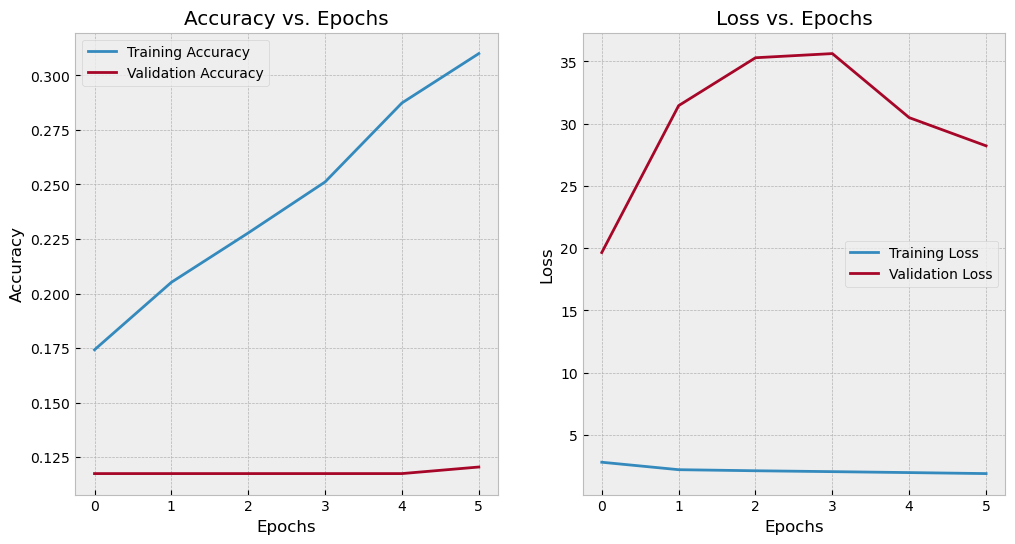

In [11]:
# Plot the learning curves
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:
# Evaluate on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 179ms/step - accuracy: 0.1151 - loss: 19.8366
Validation Accuracy: 0.1175
Validation Loss: 19.6511


**Hyperparameter set 2**

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the improved CNN model
def Model_second(input_shape=(300, 300, 3), num_classes=10):
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Dropout(0.3),

        # Second convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Dropout(0.3),

        # Third convolutional block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Dropout(0.4),

        # Fourth convolutional block
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Dropout(0.4),

        # Flatten and dense layers
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create the improved model
model_2 = Model_second()

# Compile the model
model_2.compile(optimizer=Adam(learning_rate=0.00005),  # Reduced learning rate
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Display the model summary
model_2.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 150, 150, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    21,233,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,626,826 (82.50 MB)

 Trainable params: 21,625,866 (82.50 MB)

 Non-trainable params: 960 (3.75 KB)

In [15]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_2.keras', save_best_only=True, monitor='val_loss')

# Train the improved model
history = model_2.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the trained model in .keras and .h5 formats
# model_2.save('final_model_2.keras')  # Save in Keras format
model_2.save('final_model_flower2.h5')    # Save in HDF5 format

print("Model training complete and saved successfully!")


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.2263 - loss: 3.2722 - val_accuracy: 0.1145 - val_loss: 2.8181
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 93s 2s/step - accuracy: 0.5248 - loss: 1.6954 - val_accuracy: 0.1145 - val_loss: 3.2579
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.5900 - loss: 1.3569 - val_accuracy: 0.1145 - val_loss: 5.6933
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.6551 - loss: 1.0182 - val_accuracy: 0.1145 - val_loss: 6.0989
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.7254 - loss: 0.8436 - val_accuracy: 0.1145 - val_loss: 7.5747
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.7880 - loss: 0.6262 - val_accuracy: 0.1265 - val_loss: 8.5956


Model training complete and saved successfully!


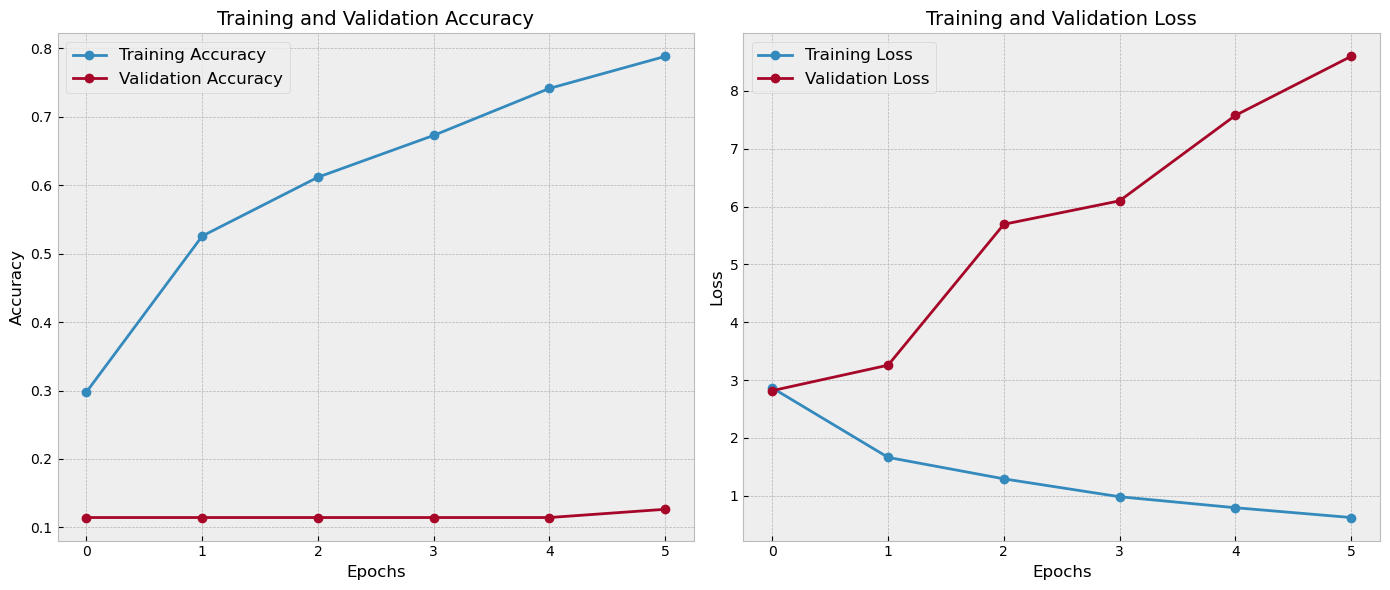

In [16]:
import matplotlib.pyplot as plt

# Plot the learning curves
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

# Display the plots
plt.tight_layout()
plt.show()


In [17]:
# Evaluate the improved model on the validation set
val_loss, val_accuracy = model_2.evaluate(X_val, y_val, verbose=1)

# Print the results
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.1149 - loss: 2.8193
Validation Accuracy: 0.1145
Validation Loss: 2.8181


**Hyperparameter set 3**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the revised CNN model
def model_third(input_shape=(300, 300, 3), num_classes=10):
    model = Sequential([
        # First convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Dropout(0.4),

        # Second convolutional block
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Dropout(0.4),

        # Third convolutional block
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),
        BatchNormalization(),
        Dropout(0.5),

        # Flatten and dense layers
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Create the improved model
model_3 = model_third()

# Compile the model with a lower learning rate
model_3.compile(optimizer=Adam(learning_rate=0.0001),  
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Display the model summary
model_3.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 300, 300, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 150, 150, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 87616)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    11,214,976 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,245,418 (42.90 MB)

 Trainable params: 11,245,162 (42.90 MB)

 Non-trainable params: 256 (1.00 KB)

In [20]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_3.keras', save_best_only=True, monitor='val_loss')

# Train the improved model
history = model_3.fit(
    X_train_split, y_train_split,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping, model_checkpoint]
)

# Save the trained model in .keras and .h5 formats
# model_3.save('final_model_3.keras')  # Save in Keras format
model_3.save('final_model_flower3.h5')    # Save in HDF5 format

print("Model training complete and saved successfully!")


Epoch 1/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.2280 - loss: 3.4224 - val_accuracy: 0.1747 - val_loss: 2.8583
Epoch 2/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 43s 996ms/step - accuracy: 0.5107 - loss: 1.5874 - val_accuracy: 0.1145 - val_loss: 4.3398
Epoch 3/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5708 - loss: 1.2813 - val_accuracy: 0.1114 - val_loss: 7.3672
Epoch 4/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.6841 - loss: 0.9508 - val_accuracy: 0.1928 - val_loss: 6.7498
Epoch 5/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7283 - loss: 0.7642 - val_accuracy: 0.1145 - val_loss: 13.8814
Epoch 6/20
42/42 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.7686 - loss: 0.6549 - val_accuracy: 0.1355 - val_loss: 9.1189


Model training complete and saved successfully!


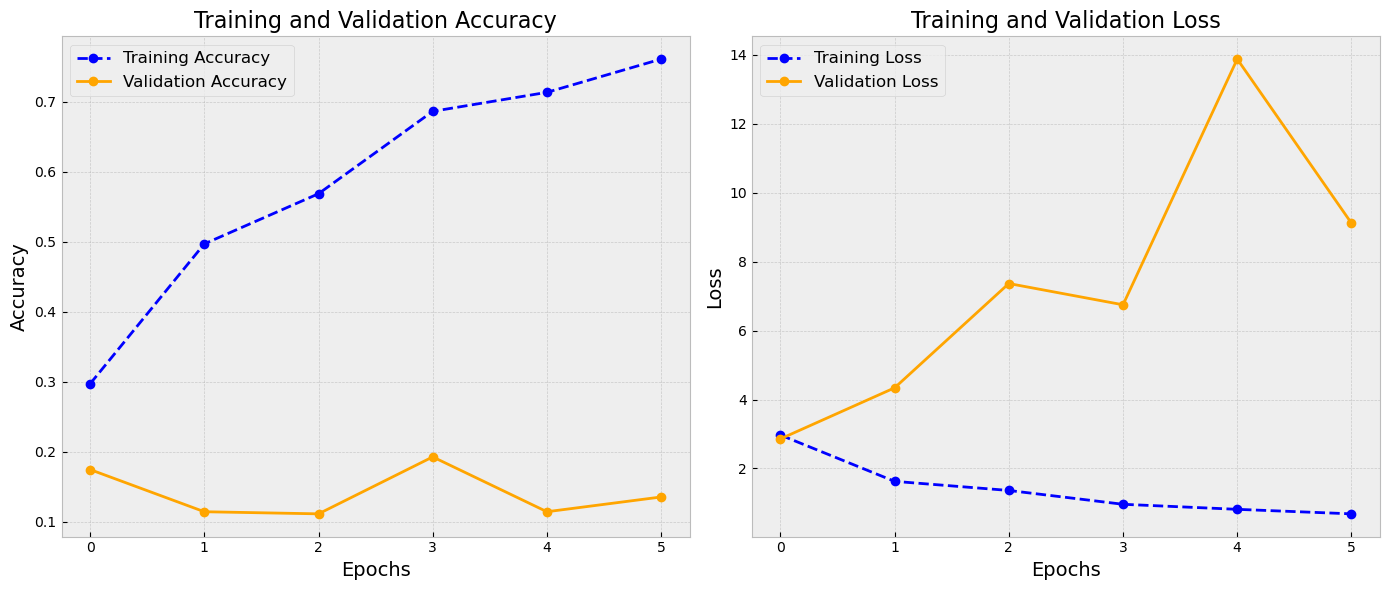

In [21]:
import matplotlib.pyplot as plt

# Plot the learning curves
plt.figure(figsize=(14, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o', linestyle='--', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o', linestyle='-', color='orange')
plt.title('Training and Validation Accuracy', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', marker='o', linestyle='--', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o', linestyle='-', color='orange')
plt.title('Training and Validation Loss', fontsize=16)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Display the plots
plt.tight_layout()
plt.show()


In [22]:
# Evaluate the improved model on the validation set
val_loss, val_accuracy = model_3.evaluate(X_val, y_val, verbose=1)

# Print the results
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 176ms/step - accuracy: 0.1697 - loss: 2.7839
Validation Accuracy: 0.1747
Validation Loss: 2.8583


**Transfer Learning**

In [24]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model

# Load the pre-trained MobileNetV2 model
base_model = MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet',classes=10)

# Freeze the base model layers
base_model.trainable = False

# Add custom layers on top
model_pt = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model_pt.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model_pt.fit(X_train_split, y_train_split,
                    validation_data=(X_val, y_val),
                    epochs=30,
                    batch_size=32,
                    callbacks=[early_stopping, model_checkpoint])



/var/folders/_7/5njfsggn3j538cj0dd_22b680000gn/T/ipykernel_63782/3738323737.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet',classes=10)


Epoch 1/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.4155 - loss: 2.1350 - val_accuracy: 0.8675 - val_loss: 0.4421
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 27s 634ms/step - accuracy: 0.8576 - loss: 0.4191 - val_accuracy: 0.9006 - val_loss: 0.3250
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 34s 820ms/step - accuracy: 0.9193 - loss: 0.2500 - val_accuracy: 0.9217 - val_loss: 0.2756
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 31s 732ms/step - accuracy: 0.9460 - loss: 0.1946 - val_accuracy: 0.9277 - val_loss: 0.2261
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 29s 691ms/step - accuracy: 0.9591 - loss: 0.1238 - val_accuracy: 0.9277 - val_loss: 0.2450
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 36s 866ms/step - accuracy: 0.9716 - loss: 0.0868 - val_accuracy: 0.9066 - val_loss: 0.2835
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 35s 805ms/step - accuracy: 0.9657 - loss: 0.0956 - val_accuracy: 0.9247 - val_loss: 0.2860
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 29s 669ms/step - accuracy: 0.9755 - loss: 0.0656 - val_accurac

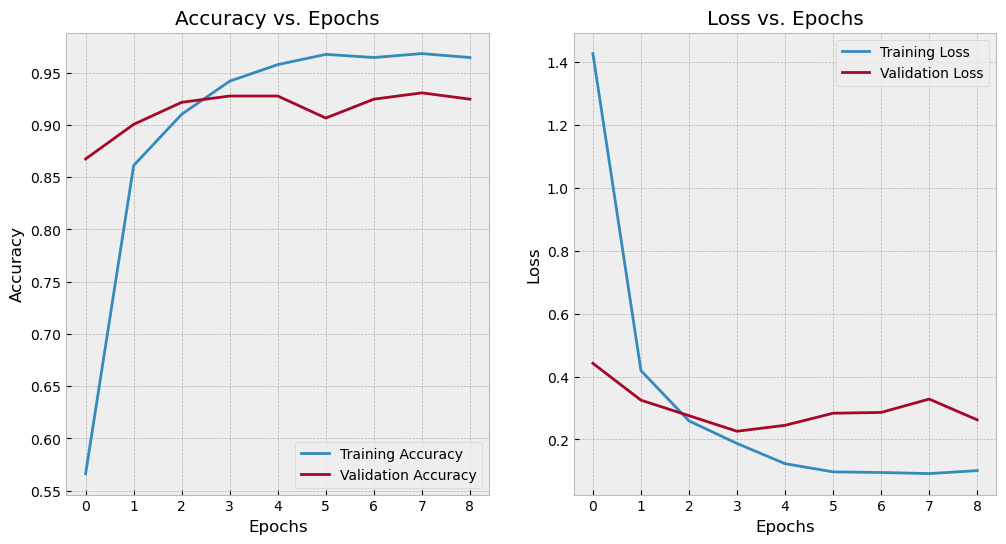

In [25]:
# Plot learning curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [26]:
val_loss, val_accuracy = model_pt.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Loss: {val_loss:.4f}")


11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 566ms/step - accuracy: 0.9192 - loss: 0.2414
Validation Accuracy: 0.9277
Validation Loss: 0.2261


In [27]:
# Save the trained model in HDF5 format
model_pt.save('mobilenetv2_model_flower.h5')  # Save the entire model
print("Model saved successfully as 'mobilenetv2_model.h5'")


Model saved successfully as 'mobilenetv2_model.h5'


**Dataset 2: Car Detection Dataset**

In [30]:
!pip install opencv-python

from PIL import Image
import cv2 # install opencv, if you don't already have it (https://pypi.org/project/opencv-python/)
import pandas as pd

In [31]:
bbox = pd.read_csv('car_detection_dataset/train_bounding_boxes.csv')
bbox

,image,xmin,ymin,xmax,ymax
0,vid_4_1000.jpg,281.259045,187.035071,327.727931,223.225547
1,vid_4_10000.jpg,15.163531,187.035071,120.329957,236.430180
2,vid_4_10040.jpg,239.192475,176.764801,361.968162,236.430180
3,vid_4_10020.jpg,496.483358,172.363256,630.020260,231.539575
4,vid_4_10060.jpg,16.630970,186.546010,132.558611,238.386422
...,...,...,...,...,...
554,vid_4_9860.jpg,0.000000,198.321729,49.235251,236.223284
555,vid_4_9880.jpg,329.876184,156.482351,536.664239,250.497895
556,vid_4_9900.jpg,0.000000,168.295823,141.797524,239.176652
557,vid_4_9960.jpg,487.428988,172.233646,616.917699,228.839864


In [32]:
N = len(bbox) # no. of training samples

# Create a numpy array with all images
for i in range(N): 
    filename='car_detection_dataset/training_images/'+bbox['image'][i]
    image = np.array(Image.open(filename))
    image_col = image.ravel()[:,np.newaxis]
    
    if i==0:
        X_train = image_col
    else:
        X_train = np.hstack((X_train, image_col))

# Training feature matrices
X_train = X_train.T

# Training labels
t_train = bbox.drop('image', axis=1).round().to_numpy().astype(int)

X_train.shape, t_train.shape

((559, 770640), (559, 4))

In [33]:
# size of each RGB image
(Nx,Ny,Nz) = image.shape

Nx, Ny, Nz

(380, 676, 3)

In [34]:
# Example of object visualization using opencv rectangle function
idx=N-1
x= image

plt.imshow(x)
cv2.rectangle(x, (t_train[idx,0], t_train[idx,1]), 
              (t_train[idx,2], t_train[idx,3]), 
              (255, 0, 0), 2);

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_val, t_train, t_val = train_test_split(X_train, t_train, test_size=0.2, random_state=42)


In [56]:
X_train = X_train / 255.0
X_val = X_val / 255.0

# Ensure bounding box coordinates are float before normalization
t_train = t_train.astype(float)
t_val = t_val.astype(float)

# Normalize bounding box coordinates (relative to image dimensions)
t_train[:, [0, 2]] /= 676  # Normalize x_min and x_max by width
t_train[:, [1, 3]] /= 380  # Normalize y_min and y_max by height

t_val[:, [0, 2]] /= 676  # Normalize x_min and x_max by width
t_val[:, [1, 3]] /= 380  # Normalize y_min and y_max by height

In [57]:
X_train = X_train.reshape(-1, 380, 676, 3)
X_val = X_val.reshape(-1, 380, 676, 3)

In [58]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(380, 676, 3))

# Freeze the base model layers to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False


In [59]:
# Define custom layers
input_layer = Input(shape=(380, 676, 3))
x = base_model(input_layer)
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(4, activation='linear')(x)  # Output layer for bounding box regression

# Create the complete model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse', metrics=['mae'])

# Display model summary
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 380, 676, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 12, 22, 2048)   │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,145,668 (92.11 MB)

 Trainable params: 557,956 (2.13 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [60]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('pretrained_car_detection.keras', save_best_only=True)
]

# Train the custom layers
history = model.fit(
    X_train, t_train,
    validation_data=(X_val, t_val),
    epochs=20,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step - loss: 3.1961 - mae: 1.3675 - val_loss: 0.3096 - val_mae: 0.5066
Epoch 2/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 107s 4s/step - loss: 0.6509 - mae: 0.6450 - val_loss: 0.3360 - val_mae: 0.5352
Epoch 3/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - loss: 0.2183 - mae: 0.3625 - val_loss: 0.2988 - val_mae: 0.5032
Epoch 4/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - loss: 0.0724 - mae: 0.2123 - val_loss: 0.3131 - val_mae: 0.5160
Epoch 5/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - loss: 0.0245 - mae: 0.1225 - val_loss: 0.3101 - val_mae: 0.5140
Epoch 6/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 103s 4s/step - loss: 0.0105 - mae: 0.0817 - val_loss: 0.3185 - val_mae: 0.5209
Epoch 7/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - loss: 0.0037 - mae: 0.0488 - val_loss: 0.3264 - val_mae: 0.5287
Epoch 8/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 98s 4s/step - loss: 0.0014 - mae: 0.0294 - val_loss: 0.3311 - val_mae: 0.5324
Epoch 9/20
28/28 ━━━━━━━━━━━━━━━━━━━━ 97s 3s/step - loss: 4.6279e

In [61]:
# Unfreeze the last few layers of the pre-trained model
for layer in base_model.layers[-10:]:
    layer.trainable = True

# Compile the model with a lower learning rate for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='mse', metrics=['mae'])

# Fine-tune the model
fine_tune_history = model.fit(
    X_train, t_train,
    validation_data=(X_val, t_val),
    epochs=10,
    batch_size=16,
    callbacks=callbacks
)


Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - loss: 0.0756 - mae: 0.2172 - val_loss: 0.3314 - val_mae: 0.5307
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 100s 4s/step - loss: 0.0175 - mae: 0.1035 - val_loss: 0.3752 - val_mae: 0.5686
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - loss: 0.0034 - mae: 0.0460 - val_loss: 0.4016 - val_mae: 0.5913
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - loss: 4.9023e-04 - mae: 0.0171 - val_loss: 0.4041 - val_mae: 0.5902
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 110s 4s/step - loss: 5.3091e-05 - mae: 0.0056 - val_loss: 0.3940 - val_mae: 0.5815
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - loss: 3.4533e-06 - mae: 0.0015 - val_loss: 0.3796 - val_mae: 0.5704
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 117s 4s/step - loss: 9.4639e-07 - mae: 7.7987e-04 - val_loss: 0.3709 - val_mae: 0.5642
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - loss: 6.0786e-07 - mae: 6.2760e-04 - val_loss: 0.3630 - val_mae: 0.5583
Epoch 9/10
28/28 ━━━━━━━━━━━━━━━━━━━

In [62]:
model.save('resnet50_car_detection_model.keras')


**Hyperparameter set 1**

In [68]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


def preprocess_train_data(images_dir, annotations_file):
   
    # Load annotations
    annotations = pd.read_csv(annotations_file)

    X_train = []
    y_train = []

    for _, row in annotations.iterrows():
        # Load and preprocess image
        image_path = os.path.join(images_dir, row['image'])
        image = Image.open(image_path).resize((676, 380))  # Resize to (width, height)
        X_train.append(np.array(image) / 255.0)  # Normalize pixel values to [0, 1]

        # Normalize bounding box
        bbox = [
            row['xmin'] / 676,  # Normalize x_min
            row['ymin'] / 380,  # Normalize y_min
            row['xmax'] / 676,  # Normalize x_max
            row['ymax'] / 380   # Normalize y_max
        ]
        y_train.append(bbox)

    return np.array(X_train), np.array(y_train)



In [69]:

# Path to the training images and annotations
images_dir = "car_detection_dataset/training_images"
annotations_file = "car_detection_dataset/train_bounding_boxes.csv"

# Preprocess the training data
X, y = preprocess_train_data(images_dir, annotations_file)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")







Training data shape: (447, 380, 676, 3)
Validation data shape: (112, 380, 676, 3)


In [70]:

# --- Step 2: Define the Model ---
def create_model():
    """
    Define a CNN model for bounding box regression.
    """
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(380, 676, 3)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(4, activation='linear')  # Bounding box regression
    ])

    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

model = create_model()
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 378, 674, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 189, 337, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 187, 335, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 93, 167, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 91, 165, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 45, 82, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 472320)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 256)            │   120,914,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,008,452 (461.61 MB)

 Trainable params: 121,008,452 (461.61 MB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# --- Step 3: Train the Model ---
# Define callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint("best_car_detection_model.keras", save_best_only=True)
]

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=16,
    callbacks=callbacks
)

# Save the final model
model.save("car_detection_model_1.keras")

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 131s 5s/step - loss: 111.3679 - mae: 4.0717 - val_loss: 0.0568 - val_mae: 0.1750
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 91s 3s/step - loss: 0.1045 - mae: 0.2512 - val_loss: 0.0651 - val_mae: 0.1999
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 94s 3s/step - loss: 0.1014 - mae: 0.2550 - val_loss: 0.0669 - val_mae: 0.1870
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 77s 3s/step - loss: 0.0876 - mae: 0.2286 - val_loss: 0.0502 - val_mae: 0.1568
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 100s 3s/step - loss: 0.0782 - mae: 0.2163 - val_loss: 0.0446 - val_mae: 0.1474
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 87s 3s/step - loss: 0.0883 - mae: 0.2325 - val_loss: 0.0537 - val_mae: 0.1617
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 89s 3s/step - loss: 0.0736 - mae: 0.2155 - val_loss: 0.0725 - val_mae: 0.2198
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - loss: 0.0877 - mae: 0.2322 - val_loss: 0.0807 - val_mae: 0.2228
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - loss: 0.0782 - m

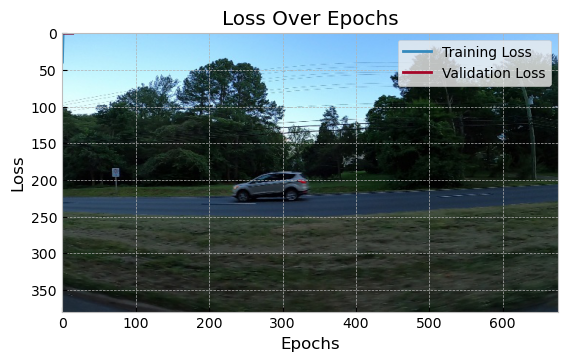

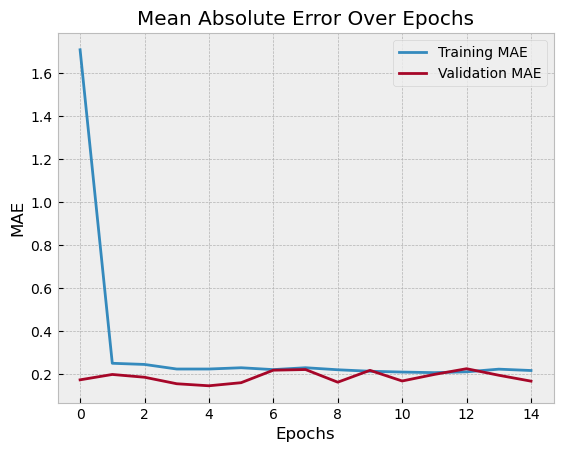

In [72]:
# --- Step 4: Plot Training History ---
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Mean Absolute Error Over Epochs')
plt.show()

**Hyperparameter set2**

In [3]:
import os
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau

def preprocess_train_data(images_dir, annotations_file):
    """
    Preprocess training images and labels.
    Args:
        images_dir: Directory containing training images.
        annotations_file: CSV file with bounding box annotations.
    Returns:
        X_train: Preprocessed images (num_samples, height, width, channels).
        y_train: Normalized bounding box coordinates (num_samples, 4).
    """
    # Load annotations
    annotations = pd.read_csv(annotations_file)

    X_train = []
    y_train = []

    for _, row in annotations.iterrows():
        # Load and preprocess image
        image_path = os.path.join(images_dir, row['image'])
        image = Image.open(image_path).resize((676, 380))  # Resize to (width, height)
        X_train.append(np.array(image) / 255.0)  # Normalize pixel values to [0, 1]

        # Normalize bounding box
        bbox = [
            row['xmin'] / 676,  # Normalize x_min
            row['ymin'] / 380,  # Normalize y_min
            row['xmax'] / 676,  # Normalize x_max
            row['ymax'] / 380   # Normalize y_max
        ]
        y_train.append(bbox)

    return np.array(X_train), np.array(y_train)

# Path to the training images and annotations
images_dir = "car_detection_dataset/training_images"
annotations_file = "car_detection_dataset/train_bounding_boxes.csv"

# Preprocess the training data
X, y = preprocess_train_data(images_dir, annotations_file)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")




Training data shape: (447, 380, 676, 3)
Validation data shape: (112, 380, 676, 3)


In [4]:
# --- Step 2: Define the Model ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

def car_model_2():
    """
    Define an improved CNN model for bounding box regression.
    """
    model = Sequential([
        # First Convolutional Block
        Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(380, 676, 3)),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),
        
        # Second Convolutional Block
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Third Convolutional Block
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D(pool_size=(2, 2)),

        # Fully Connected Layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dropout(0.3),
        
        # Output Layer
        Dense(4, activation='linear')  # Bounding box regression
    ])
    
    # Compile the model
    model.compile(
        optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
        loss='mse',
        metrics=['mae']
    )
    return model

model = car_model_2()
model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 380, 676, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 380, 676, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 190, 338, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 190, 338, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 190, 338, 128)  │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 95, 169, 128)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 95, 169, 256)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 95, 169, 256)   │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 47, 84, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1010688)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   517,472,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 517,977,732 (1.93 GB)

 Trainable params: 517,976,836 (1.93 GB)

 Non-trainable params: 896 (3.50 KB)

In [5]:
callbacks = [
    EarlyStopping(patience=15, restore_best_weights=True),  # Stop if no improvement
    ModelCheckpoint("best_improved_car_detection_model.keras", save_best_only=True),
    ReduceLROnPlateau(factor=0.1, patience=5, verbose=1)  # Reduce learning rate on plateau
]

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,  # Allow more epochs for better convergence
    batch_size=32,  # Larger batch size for stable training
    callbacks=callbacks
)
# Save the final model
model.save("car_detection_model_2.keras")

Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 481s 33s/step - loss: 18071.3086 - mae: 70.2672 - val_loss: 1.6370 - val_mae: 0.9677 - learning_rate: 1.0000e-04
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 435s 31s/step - loss: 265.0457 - mae: 12.1959 - val_loss: 20.9436 - val_mae: 3.9339 - learning_rate: 1.0000e-04
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 443s 31s/step - loss: 38.0897 - mae: 4.0481 - val_loss: 61.7995 - val_mae: 6.9937 - learning_rate: 1.0000e-04
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 419s 30s/step - loss: 12.9602 - mae: 1.9659 - val_loss: 111.4070 - val_mae: 9.4109 - learning_rate: 1.0000e-04
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 403s 29s/step - loss: 4.4339 - mae: 1.0111 - val_loss: 169.4540 - val_mae: 11.6515 - learning_rate: 1.0000e-04
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - loss: 2.9151 - mae: 0.6935 
Epoch 6: ReduceLROnPlateau reducing learning rate to 9.999999747378752e-06.
14/14 ━━━━━━━━━━━━━━━━━━━━ 422s 30s/step - loss: 2.8548 - mae: 0.6911 - val_loss: 220.4771 - val_

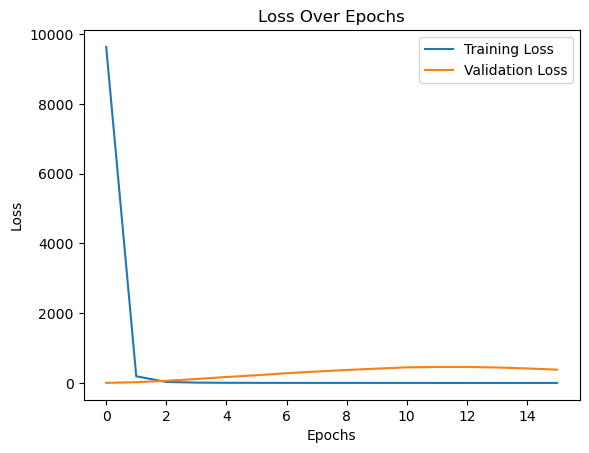

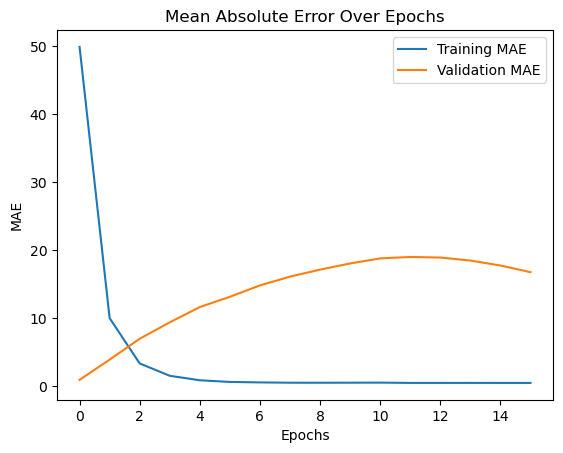

In [6]:

# --- Step 4: Plot Training History ---
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()

# Plot MAE
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Mean Absolute Error Over Epochs')
plt.show()

 # 3. Validating Performance in the Test Set Without Target Labels

## 1. Visual Inspection
- Overlay predicted bounding boxes on the test images.
- Assess visually if the bounding boxes align with cars in the images.
- This qualitative method helps identify obvious mispredictions but lacks a quantitative metric.

---

## 2. Annotate a Subset of the Test Set
- Use tools like **MakeSenseAI** to manually annotate a small subset of the test set.
- Export these annotations and use them as ground truth for performance evaluation.
- This allows for a more quantitative evaluation using metrics like Intersection over Union (IoU).

---

## 3. Metrics for Quantitative Evaluation

### Intersection over Union (IoU)
- IoU measures the overlap between the predicted bounding box and the ground truth bounding box.
- **Formula**:
  \[
  IoU = \frac{\text{Area of Overlap}}{\text{Area of Union}}
  \]
- Define an IoU threshold (e.g., IoU > 0.5) to classify predictions as acceptable.

### Accuracy for No-Car Images
- For images without cars, the predicted bounding box should be `[0, 0, 0, 0]`.
- Compute the proportion of correctly identified no-car images:
  \[
  \text{No-Car Accuracy} = \frac{\text{Correct No-Car Predictions}}{\text{Total No-Car Images}}
  \]

---

## 4. Handling Images Without Cars

### Training
- Include images without cars in the training dataset.
- Assign these images a fixed bounding box of `[0, 0, 0, 0]`.

### Post-Processing
- Define a threshold to identify no-car predictions. For instance, if the predicted bounding box is close to `[0, 0, 0, 0]` within a tolerance, classify it as a no-car prediction.

---

## 5. Overlapping Region of Interest (ROI)
- The exact bounding box may not always be the target. Small deviations in predictions are acceptable.
- Use IoU as a measure of acceptable overlap:
  - IoU > 0.5: Prediction is acceptable.
  - IoU ≤ 0.5: Prediction is inaccurate.

---

## 6. Using MakeSenseAI
- Manually annotate a subset of test images:
  - Label images with cars using bounding boxes.
  - Leave images without cars blank or label them as "No Car."
- Export the annotations and use them for validation:
  - Compute IoU for images with cars.
  - Measure no-car accuracy for images without cars.

---

## Conclusion
1. **For images with cars**:
   - Validate using IoU and report the proportion of predictions with IoU above a defined threshold.
2. **For images without cars**:
   - Include them in training and validation with fixed labels `[0, 0, 0, 0]`.
   - Measure the model's accuracy in predicting these cases.

This hybrid approach ensures both qualitative and quantitative validation, even without full ground truth labels for the test set.
